In [1]:
import numpy as np
# Import our stress_profile function
from stress_profile_sol import stress_profile

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)
------------------------------------------
  0.00       0.00       0.00       0.00
  4.00      64.84       0.00      64.84
 14.00     272.94      98.10     174.84


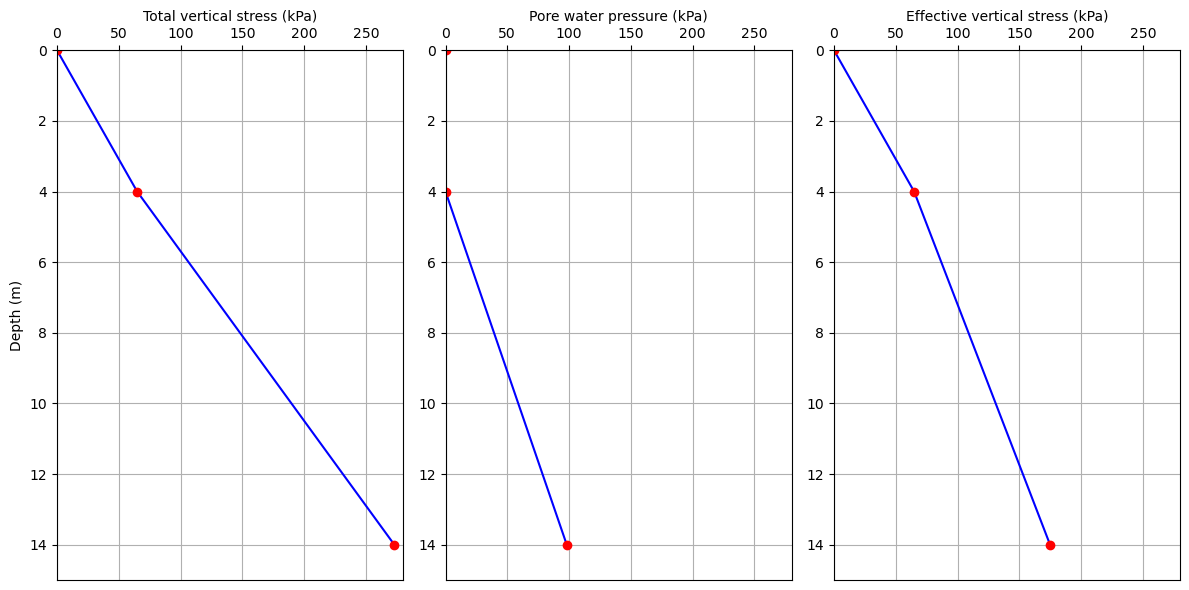

In [ ]:
# Lecture 7, example 1a
# Example 9.1 of Das (2022): Geotechnical Engineering
# Part a
bases = np.array([4, 14])
gammas = np.array([16.21, 20.81])
k0 = np.array([0, 0])
gw = 4
stress_profile(bases, gammas, k0, gw)

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)
------------------------------------------
  0.00       0.00       0.00       0.00
  2.00      32.42       0.00      32.42
  4.00      72.26      19.62      52.64
 14.00     280.36     117.72     162.64


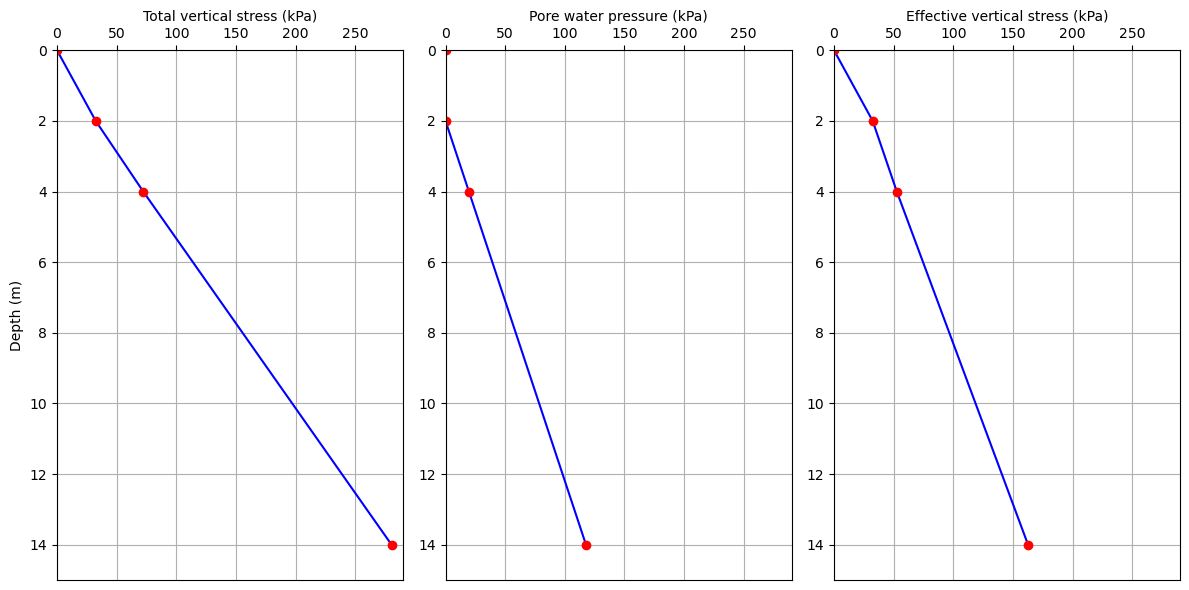

In [3]:
# Lecture 7, example 1b
# Example 9.1 of Das (2022): Geotechnical Engineering
# Part b
bases = np.array([2, 4, 14])
gammas = np.array([16.21, 19.92, 20.81])
k0 = np.array([0, 0, 0])
gw = 2
stress_profile(bases, gammas, k0, gw)

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)  σ_x' (kPa)  σ_x (kPa)
------------------------------------------------------------------
  0.00     100.00       0.00     100.00      55.00      55.00
  2.00     138.00       0.00     138.00      75.90      75.90
  5.00     198.00      30.00     168.00      92.40     122.40


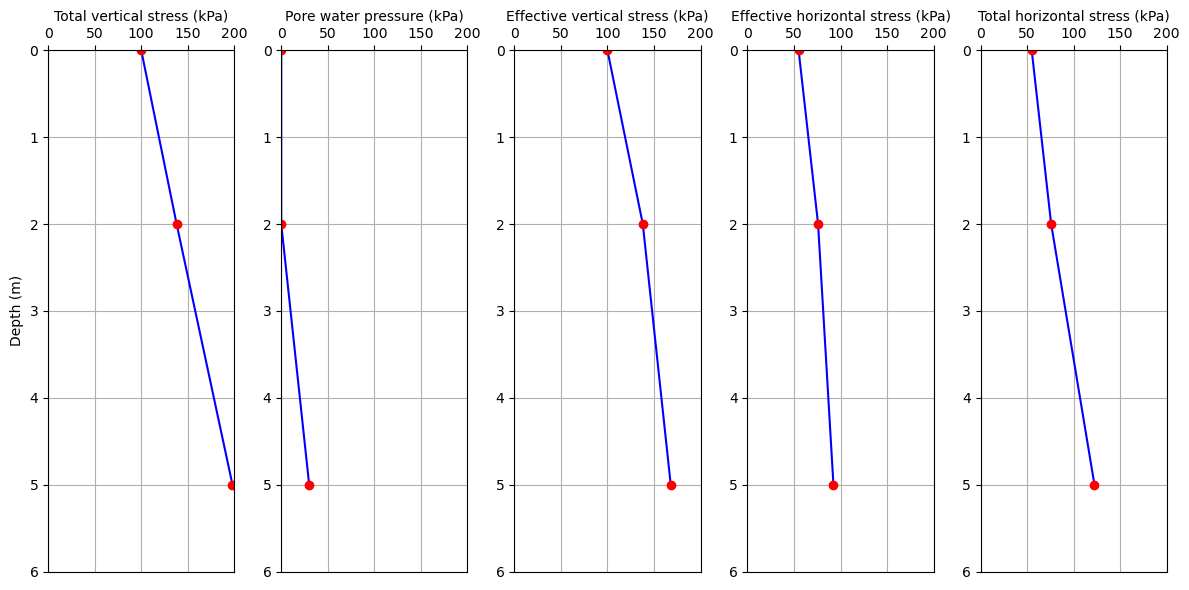

In [ ]:
# Lecture 8, example 1
# This is example 2.7 of Aarhaug (1984)
bases = np.array([2, 5])
gammas = np.array([19.0, 20.0])
k0 = np.array([0.55, 0.55])
gw = 2
gamma_w = 10.0
q = 100 # surcharge in kN/m2
stress_profile(bases, gammas, k0, gw, gamma_w, q)

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)
------------------------------------------
  0.00       0.00       0.00       0.00
  4.00      71.81       0.00      71.81
 10.00     191.88      58.86     133.02


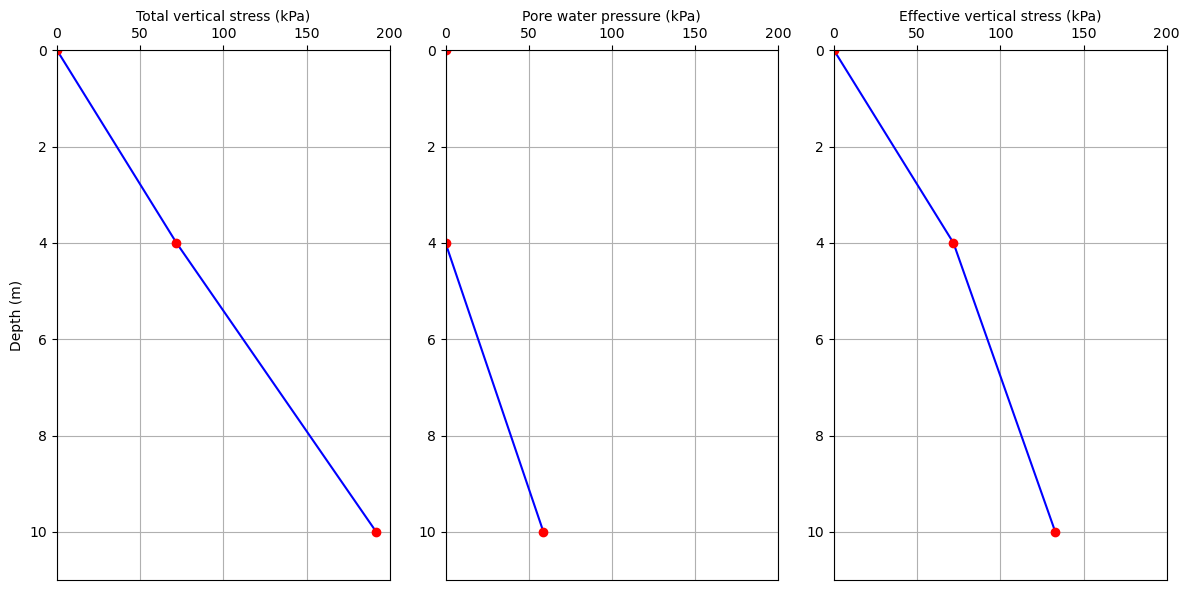

In [ ]:
# First exercise for lecture 7
# This is problem 2.1 of Aarhaug (1984)
bases = np.array([4, 10])
g = 9.81
densities = np.array([1.83, 2.04])
gammas = densities * g
k0 = np.array([0, 0])
gw = 4
gamma_w = 1.0 * g

stress_profile(bases, gammas, k0, gw, gamma_w)

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)
------------------------------------------
  0.00       0.00       0.00       0.00
  4.00      71.81      39.24      32.57
 10.00     191.88      98.10      93.78


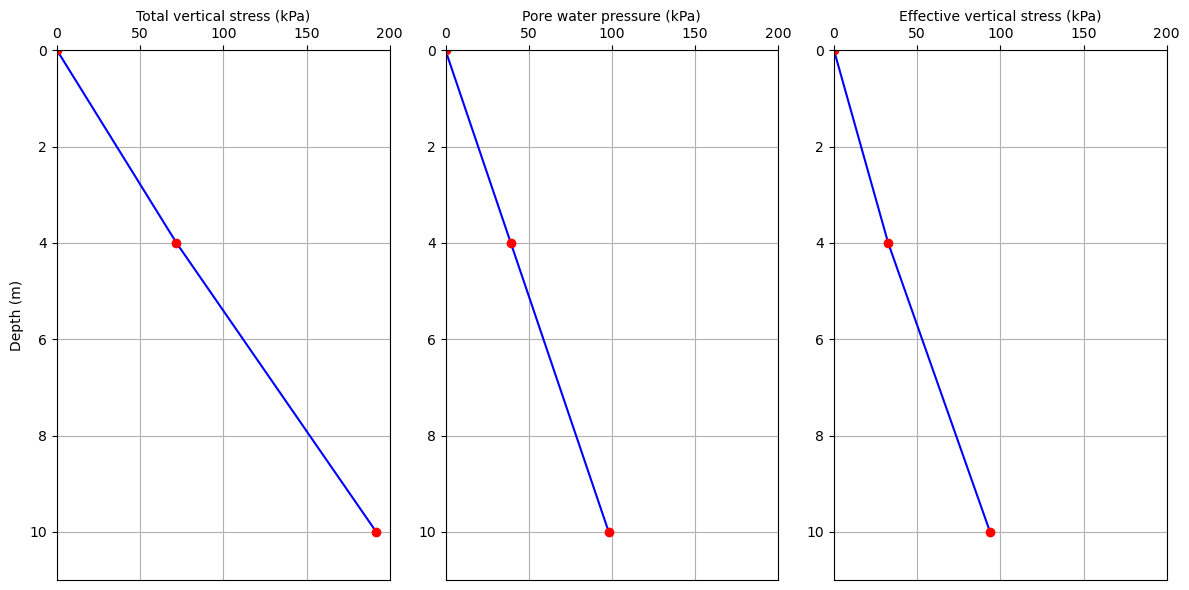

In [ ]:
# Continuation of problem 2.1
# the groundwater rises up to the ground surface
# This is problem 2.2 of Aarhaug (1984)
gw = 0
stress_profile(bases, gammas, k0, gw, gamma_w)

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)  σ_x' (kPa)  σ_x (kPa)
------------------------------------------------------------------
  0.00       0.00       0.00       0.00       0.00       0.00
  2.00      37.08       0.00      37.08      16.69      16.69
  4.00      75.14      19.62      55.52      24.99      44.61
 11.00     222.10      88.29     133.81      80.29     168.58


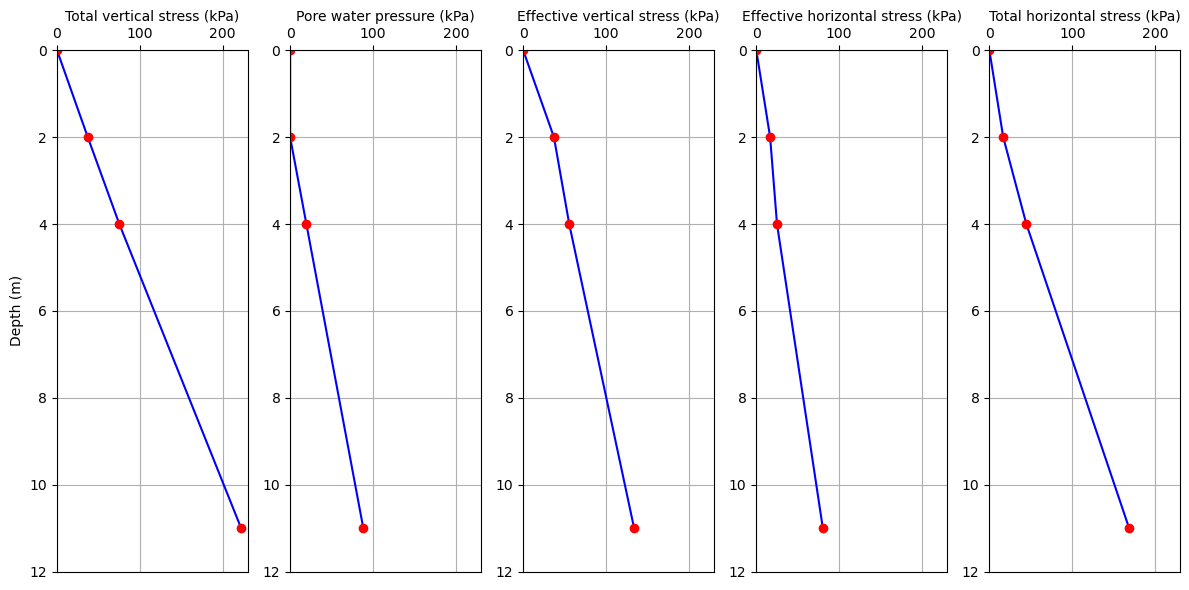

In [ ]:
# First exercise for lecture 8
# This is problem 2.3 of Aarhaug (1984)
bases = np.array([2, 4, 11])
g = 9.81
densities = np.array([1.89, 1.94, 2.14])
gammas = densities * g
k0 = np.array([0.45, 0.45, 0.6])
gw = 2.0
gamma_w = 1.0 * g

stress_profile(bases, gammas, k0, gw, gamma_w)

In [8]:
tau_max = (133.81 - 80.29) / 2
print(f"Maximum shear stress = {tau_max:.2f} kPa")

Maximum shear stress = 26.76 kPa
